# TD-DFT sampling analysis

In [1]:
# Reload all modules
# This is useful when you need to edit a module without
# closing the notebook.

%load_ext autoreload
%autoreload 2

In [2]:
# Modules are loaded

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
from scipy.constants import e, h, c, k
from scipy.stats import norm

In [3]:
# submodule stamptools with notebooks tools
from stamptools import nbconfig

In [4]:
# Show information from nbconfig
nbconfig.showInfo()

Functions or objects in nbconfig
--------------------------------

    MplotParam : (dict)
        Matplotlib parameters to change.

    boxText : (dict)
        Box on text in figures.

    rot : (function)
        Rotate the negative angles by 360 degrees.

    toTime : (function)
        Convert regular frames to time (in ps).

    binned_distance : (function)
        Binned distances (in nm).

    


In [5]:
# Load my parameters in the matplotlib setting
plt.rcParams.update(nbconfig.MplotParam)

Creating UV/Visible Plots from the Results of Excited States Calculations

$$\varepsilon_i(\tilde{\nu}) = \varepsilon_i^{{max}}\left[-\left(\frac{\tilde{\nu} - \tilde{\nu}_i}{\sigma}\right)^2\right] $$


[reference](https://gaussian.com/uvvisplot/)

## Load data

In [6]:
# For a file

file = "../exp.azob.stamp.3/trans/6_prod_1/SamplingUV-Vis_500_2500/azoT_PB_00039.log"

In [7]:
data = nbconfig.read_UVVis(file)

In [8]:
data

,Nstate,E,wl,f,t,p
0,1,2.9908,414.56,0.0082,55 -> 57,0.64703
1,2,3.8966,318.19,0.7860,56 -> 57,0.67339
2,3,4.7441,261.34,0.0025,53 -> 57,0.50338
3,4,4.8054,258.01,0.0011,52 -> 57,0.44818
4,5,5.0160,247.18,0.0148,54 -> 57,0.62947
5,6,5.4808,226.21,0.4493,56 -> 58,0.46826


In [23]:
spectre = nbconfig.epsilon_tot(nbconfig.w_nm, data, sigma=0.4, normalize=False)

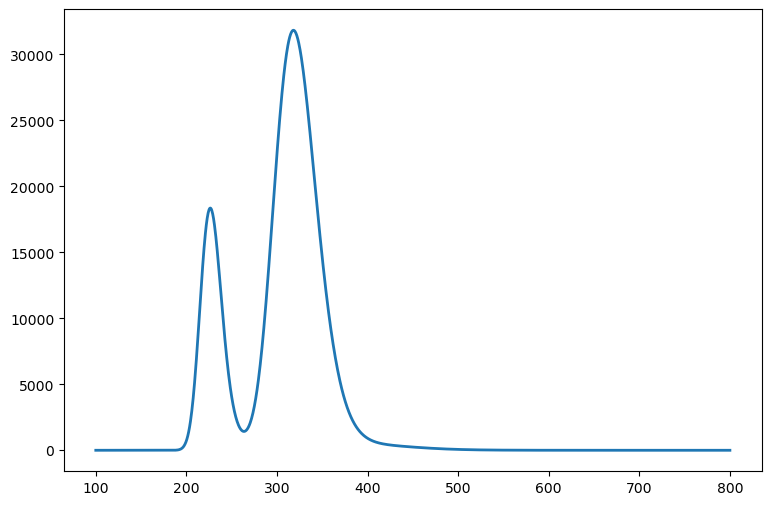

In [24]:
plt.plot(nbconfig.w_nm, spectre)

In [12]:
# more files
path = "../exp.azob.stamp.3/trans/6_prod_1/SamplingUV-Vis_500_2500/*.log"

In [27]:
spectre, info = nbconfig.get_spectre_info(
            glob.glob(path),
            sigma=0.4 # eV
        )

Number of files analyzed: 100


In [17]:
info

,isomer,replica,frame,s1,s2,s3,s4,s5,s6,f1,f2,f3,f4,f5,f6
index,,,,,,,,,,,,,,,
0,UNW,UNW,39,414.56,318.19,261.34,258.01,247.18,226.21,0.0082,0.7860,0.0025,0.0011,0.0148,0.4493
1,UNW,UNW,98,428.28,342.39,264.58,259.59,251.98,225.51,0.0166,0.9415,0.0008,0.0575,0.0114,0.2468
2,UNW,UNW,107,403.17,322.72,263.48,258.52,251.84,225.63,0.0032,0.8472,0.0035,0.0095,0.0014,0.4977
3,UNW,UNW,155,424.49,317.35,258.44,257.89,245.46,223.89,0.0093,0.8081,0.0017,0.0030,0.0045,0.3066
4,UNW,UNW,163,408.06,318.69,257.72,257.15,244.35,223.03,0.0001,0.8869,0.0009,0.0064,0.0201,0.1459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,UNW,UNW,1884,410.04,325.56,261.00,256.79,252.53,224.74,0.0027,0.8508,0.0005,0.0103,0.0043,0.3298
96,UNW,UNW,1893,435.55,323.38,270.45,259.81,255.18,231.12,0.0127,0.8735,0.0199,0.0074,0.0068,0.3975
97,UNW,UNW,1956,428.35,306.51,266.86,253.47,248.66,228.05,0.0648,0.8171,0.0169,0.0243,0.0224,0.1181


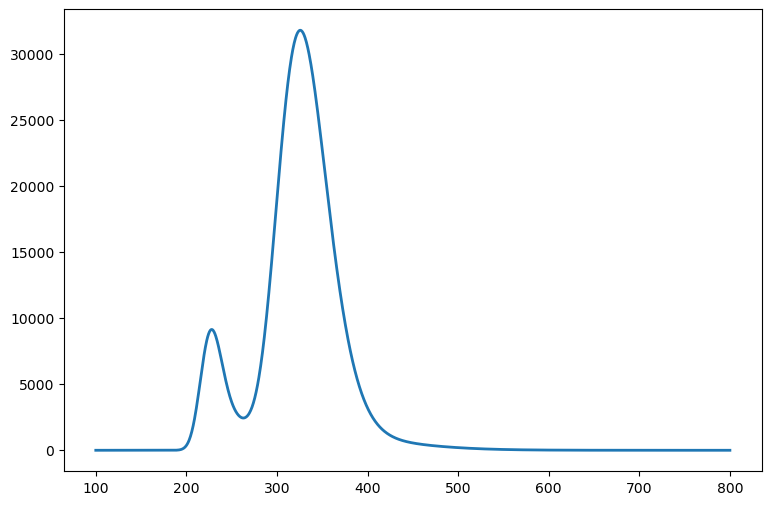

In [26]:
plt.plot(nbconfig.w_nm, spectre)

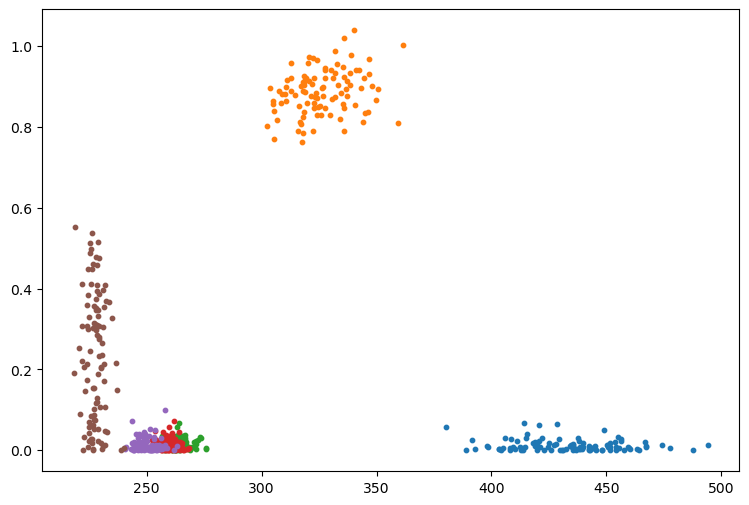

In [20]:
for n in range(1, 7):
    Sn = f"s{n}"
    Fn = f"f{n}"
    plt.scatter(info[Sn], info[Fn], label=Sn, s=10.)